Initial setup

In [1]:
import wosis
import pandas as pd
import metaknowledge as mk

In [2]:
# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

In [3]:
# Read in data from temporary cache file
query_id = "756d39801152fe5f5f4ad3a3df9b6a30"
RC = mk.RecordCollection("tmp/{}.txt".format(query_id))

expected_num_records = 15754
num_records = len(RC)

assert num_records == expected_num_records, \
    "Mismatch in number of records - expected {}, got {}".format(expected_num_records, num_records)

print("Corpora consists of", num_records, "Publications")

Corpora consists of 15754 Publications


In [4]:
corpora_df = wosis.rc_to_df(RC)

corpora_df, removed_pubs = wosis.constrain.remove_empty_DOIs(corpora_df)

Removing 1799 records with no DOIs


In [5]:
# removed_pubs

In [6]:
# Checking if expected paper is in corpora
corpora_df.loc[corpora_df['DOI'] == '10.1016/j.jocs.2015.08.008', :]

,AU,DE,DOI,SO,abstract,id,keywords,title,year
8806,"Feinberg, Jonathan|Langtangen, Hans Petter",uncertainty quantification|polynomial chaos ex...,10.1016/j.jocs.2015.08.008,JOURNAL OF COMPUTATIONAL SCIENCE,the paper describes the philosophy design func...,WOS:000367774700005,,Chaospy: An open source tool for designing met...,2015


In [7]:
# Hiding keywords and abstract for tutorial (WoS-owned IP)
hide_columns = ['DE', 'abstract', 'keywords', 'DOI', 'id', 'kws']
corpora_df.loc[:, ~corpora_df.columns.isin(hide_columns)].head()  # display first 5

,AU,SO,title,year
0,"Markus, Momcilo|Angel, James R.|Yang, Lin|Heja...",JOURNAL OF HYDROLOGY,Changing estimates of design precipitation in ...,2007
1,"Xu, Jinhu|Zhou, Yicang",APPLIED MATHEMATICAL MODELLING,Hopf bifurcation and its stability for a vecto...,2016
2,"Kim, Soojun|Kim, Yonsoo|Kang, Narae|Kim, Hung Soo",WATER,Application of the Entropy Method to Select Ca...,2015
3,"Anderson, Gregory B.|Freeman, Mary C.|Freeman,...",ENVIRONMENTAL MANAGEMENT,Dealing With Uncertainty When Assessing Fish P...,2012
4,"Ganapathysubramanian, S|Zabaras, N",INTERNATIONAL JOURNAL FOR NUMERICAL METHODS IN...,A continuum sensitivity method for finite ther...,2002


In [8]:
# Create a new metaknowledge collection
filtered_corpora = wosis.extract_recs(corpora_df.loc[:, 'id'], RC, name='Filtered Corpora')

<hr>

Plot keyword trend

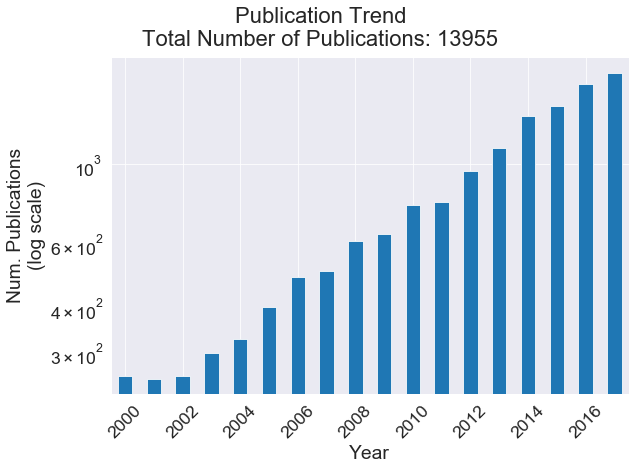

In [9]:
# Plot out the keyword trend. Can save the plot as an image if you give it a file location (will be saved in PNG format)
wos_plot.plot_pub_trend(filtered_corpora, title='Publication Trend', save_plot_fn=False)

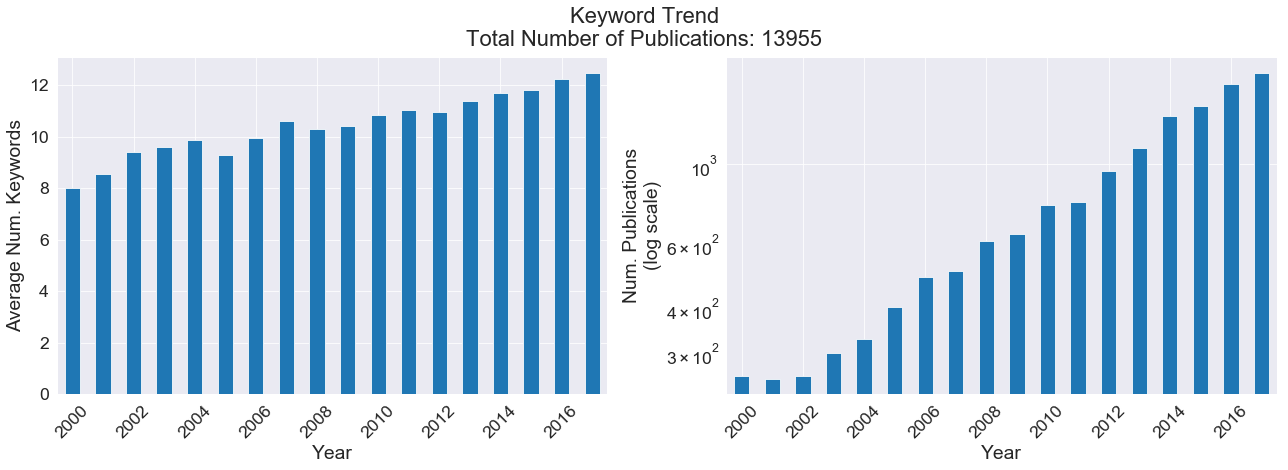

In [10]:
# Plot out the keyword trend. Can save the plot as an image if you give it a file location (will be saved in PNG format)
wos_plot.plot_kw_trend(filtered_corpora, title='Keyword Trend')

<hr>

Run topic model

In [11]:
from wosis.analysis import find_topics

filtered_corpora_df = wosis.rec_to_df(filtered_corpora)
topic_results = find_topics(filtered_corpora_df, num_topics=5)

Topic 1: model water soil flow parameters sensitivity river data groundwater analysis
Topic 2: optimization design method shape topology sensitivity problem element finite analysis
Topic 3: energy cycle environmental life emissions production assessment waste impact lca
Topic 4: uncertainty model models stochastic data analysis method quantification parameter carlo
Topic 5: risk exposure assessment health cancer risks human flood probabilistic analysis


In [12]:
topic_pubs = {
    'model': topic_results.get_topic_by_id(1),
    # 'UA': topic_results.get_topic_by_id(8)
    # 'SA': topic_results.get_topic_by_id(20)
}

# len(topic_pubs['model']), len(topic_pubs['UA'])
len(topic_pubs['model'])

5022

In [13]:
# find paper of interest - see if it's still in the corpora
for i in range(1,26):
    topic_set = topic_results.get_topic_by_id(i)
    
    topic_recs = wosis.extract_recs(topic_set.loc[:, 'id'], RC, 'Topic of Interest')
    tmp_df = pd.DataFrame(topic_recs.forNLP(extraColumns=['DOI']))

    if len(tmp_df.loc[tmp_df["DOI"] == '10.1016/j.jocs.2015.08.008', :]) > 0:
        print("Found paper in topic", i)
        break

Found paper in topic 4


In [14]:
topic_set.loc[:, ~topic_set.columns.isin(hide_columns)].head(10)

,AU,SO,title,year
3,"Anderson, Gregory B.|Freeman, Mary C.|Freeman,...",ENVIRONMENTAL MANAGEMENT,Dealing With Uncertainty When Assessing Fish P...,2012
6,"Zhang, WenJun|Liu, GuangHua|Dai, HongQing",STOCHASTIC ENVIRONMENTAL RESEARCH AND RISK ASS...,Simulation of food intake dynamics of holometa...,2008
11,"Raissi, Maziar|Perdikaris, Paris|Karniadakis, ...",JOURNAL OF COMPUTATIONAL PHYSICS,Inferring solutions of differential equations ...,2017
15,"Poette, Gael|Lucor, Didier",JOURNAL OF COMPUTATIONAL PHYSICS,Non intrusive iterative stochastic spectral re...,2012
16,"Li, W. B.|Klein, W.|Blanchardon, E.|Puncher, M...",RADIATION PROTECTION DOSIMETRY,Parameter uncertainty analysis of a biokinetic...,2015
21,"Page, T|Whyatt, JD|Beven, KJ|Metcalfe, SE",ATMOSPHERIC ENVIRONMENT,Uncertainty in modelled estimates of acid depo...,2004
22,"Aziz, M. A.|Imteaz, M. A.|Rasel, H. M.|Samsuzz...",JOURNAL OF HYDROINFORMATICS,Sensitivity analysis on the pollutant trapping...,2016
24,"Mannina, Giorgio|Cosenza, Alida|Vanrolleghem, ...",JOURNAL OF HYDROINFORMATICS,A practical protocol for calibration of nutrie...,2011
25,"Mu, Fangping|Unkefer, Pat J.|Unkefer, Clifford...",BIOINFORMATICS,Prediction of oxidoreductase-catalyzed reactio...,2006
32,"Hiriyur, Badri|Waisman, Haim|Deodatis, George",INTERNATIONAL JOURNAL FOR NUMERICAL METHODS IN...,Uncertainty quantification in homogenization o...,2011


In [15]:
topic_recs = wosis.extract_recs(topic_set.loc[:, 'id'], RC, 'Topic of Interest')

In [16]:
ua_topic_df = pd.DataFrame(topic_recs.forNLP(extraColumns=["DOI"]))

ua_topic_df.loc[ua_topic_df["DOI"] == '10.1016/j.jocs.2015.08.008', :]

,DOI,abstract,id,keywords,title,year
705,10.1016/j.jocs.2015.08.008,the paper describes the philosophy design func...,WOS:000367774700005,,Chaospy: An open source tool for designing met...,2015


In [17]:
# rec = RC.getID('WOS:000367774700005')
# rec

<hr>

Plot journal trend of topic 1, see top publications by citation

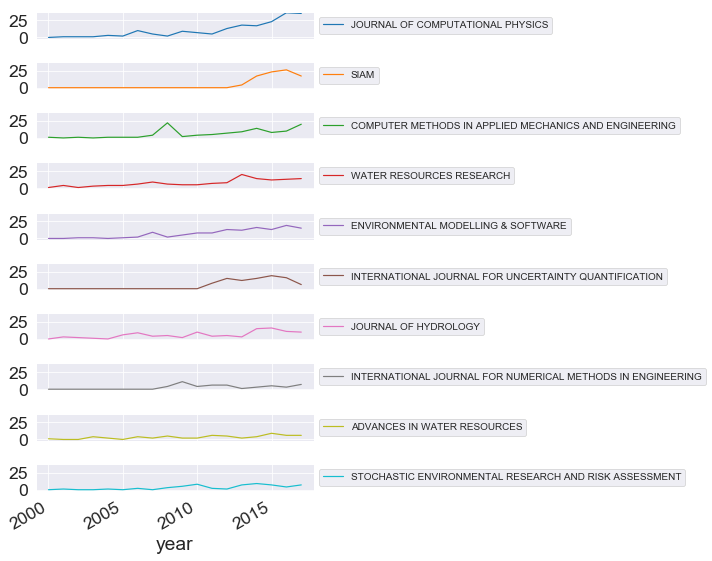

In [18]:
wos_plot.plot_journal_pub_trend(topic_recs)

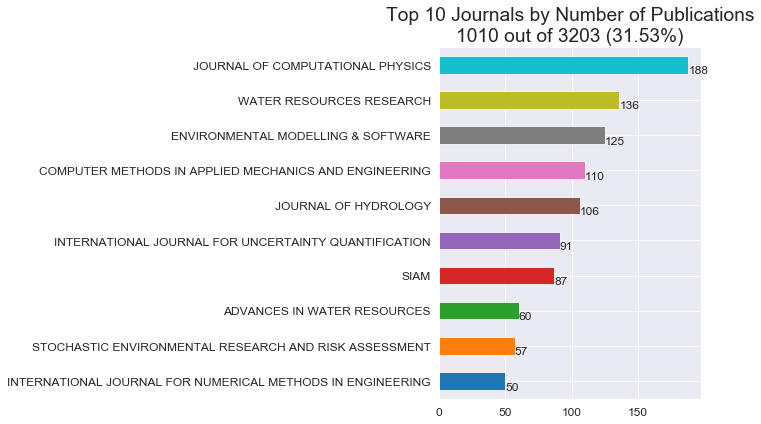

In [19]:
wos_plot.plot_pubs_per_journal(topic_recs, top_n=10, annotate=True, show_stats=True)

In [20]:
# These are the papers cited within the corpora
wosis.analysis.pub_citations(topic_recs)[0:10]
#ideas: could take first 1000 by citation number, but higher citations would favour older papers.  Taking by year?
#or simply choose first 1000 matches?

,Citations
Publication,
"Xiu, DB, 2002, The Wiener-Askey polynomial chaos for stochastic differential equations, SIAM JOURNAL ON SCIENTIFIC COMPUTING, 24, 619, 29373246",655
"Beven, K, 2005, On the concept of model structural error, WATER SCIENCE AND TECHNOLOGY, 52, 167, 61589169",645
"Saltelli, A, 1995, About the use of rank transformation in sensitivity analysis of model output, RELIABILITY ENGINEERING & SYSTEM SAFETY, 50, 225, 6699123",518
"Ghanem, R, 1991, Stochastic Finite Elements: A Spectral Approach, 277481739",467
"Saltelli, A., 2008, Global Sensitivity Analysis, The Primer, 287698885",304
"Helton, JC, 2003, Latin hypercube sampling and the propagation of uncertainty in analyses of complex systems, RELIABILITY ENGINEERING & SYSTEM SAFETY, 81, 23, 115046",251
"Le Maitre, OP, 2004, Multi-resolution analysis of Wiener-type uncertainty propagation schemes, JOURNAL OF COMPUTATIONAL PHYSICS, 197, 502, 47398756",246
"Sobol, I. M., 1993, Sensitivity analysis for nonlinear mathematical models, Math. Model. Comput. Exp., 1, 407, 2602363",235
"MCKAY, MD, 1979, A COMPARISON OF THREE METHODS FOR SELECTING VALUES OF INPUT VARIABLES IN THE ANALYSIS OF OUTPUT FROM A COMPUTER CODE, TECHNOMETRICS, 21, 239, 115518",216


In [21]:
topic_df = wosis.link_to_pub(topic_recs)  # Creates a new column called 'DOI link'
topic_df.loc[:, ~topic_df.columns.isin(hide_columns)].head(5)

,AU,SO,title,year,DOI link
0,"Sansalone, V.|Gagliardi, D.|Desceliers, C.|Hai...",COMPUTER METHODS IN BIOMECHANICS AND BIOMEDICA...,On the uncertainty propagation in multiscale m...,2015,https://dx.doi.org/10.1080/10255842.2015.1069619
1,"Sage, Jeremie|Bonhomme, Celine|Berthier, Emman...",JOURNAL OF ENVIRONMENTAL ENGINEERING,Assessing the Effect of Uncertainties in Pollu...,2017,https://dx.doi.org/10.1061/(ASCE)EE.1943-7870....
2,"Roman, Henry A. .|Walker, Katherine D.|Walsh, ...",ENVIRONMENTAL SCIENCE & TECHNOLOGY,Expert judgment assessment of the mortality im...,2008,https://dx.doi.org/10.1021/es0713882
3,"Anderson, Gregory B.|Freeman, Mary C.|Freeman,...",ENVIRONMENTAL MANAGEMENT,Dealing With Uncertainty When Assessing Fish P...,2012,https://dx.doi.org/10.1007/s00267-012-9886-6
4,"Zhang, WenJun|Liu, GuangHua|Dai, HongQing",STOCHASTIC ENVIRONMENTAL RESEARCH AND RISK ASS...,Simulation of food intake dynamics of holometa...,2008,https://dx.doi.org/10.1007/s00477-006-0102-1


<hr>

Further analysis of topic model results: <br>
- Search papers in topic of interest by keyword
- Run criteria search on topic of interest
- Want to list these papers into a table to export to csv, this was formally achieved in an old notebook
- Plot trend in criteria matches
- Want to save the final plot to file, but it doesn't use the standard wos_plot function

In [22]:
# find papers of interest - having certain keywords

topic_set = topic_results.get_topic_by_id(2)

topic_recs = wosis.extract_recs(topic_set.loc[:, 'id'], RC, 'Topic of Interest')
# tmp_df = pd.DataFrame(topic_recs.forNLP(extraColumns=['DE']))
# need this next command to be keywords including ... eg uncertainty

uncertainty_recs = wosis.search_records(topic_recs, "uncertainty", threshold=95.0)
uncertainty_df = wosis.rc_to_df(uncertainty_recs)

uncertainty_df.head()

# some more ideas: filter topic 2 by papers with sensitivity in title/keywords/abstract to decrease size of dataset.
# might work for topic 1 as well?

,AU,DE,DOI,SO,abstract,id,keywords,title,year
0,"Shariatmadari, Mohammad|Nahavandi, Nasim|Zegor...",integrated resource management (irm)|project s...,10.1016/j.cie.2017.04.003,COMPUTERS & INDUSTRIAL ENGINEERING,nowadays resource management is one of the mos...,WOS:000405052300004,GRAVITATIONAL SEARCH ALGORITHM|TIME|COST,Integrated resource management for simultaneou...,2017
1,"Wijewickrema, Sudanthi|Zhou, Yun|Bailey, James...",virtual reality|surgery simulation|automated g...,10.1145/2993369.2993397,22ND ACM CONFERENCE ON VIRTUAL REALITY SOFTWAR...,one of the roadblocks to the widespread use of...,WOS:000391514400011,PERFORMANCE|FEEDBACK,Provision of Automated Step-by-Step Procedural...,2016
2,"Huang, Yufen|Kuo, Mei-Ling|Wang, Tai-Ho",generalized cook statistic|influence function|...,10.1016/j.csda.2006.11.005,COMPUTATIONAL STATISTICS & DATA ANALYSIS,the perturbation theory of an eigenvalue probl...,WOS:000249316000035,PRINCIPAL COMPONENTS-ANALYSIS,Pair-perturbation influence functions and loca...,2007
3,"Ganapathysubramanian, S|Zabaras, N",continuum sensitivity method (csm)|updated lag...,10.1002/nme.543,INTERNATIONAL JOURNAL FOR NUMERICAL METHODS IN...,a computational framework is presented to eval...,WOS:000179367000002,THERMOMECHANICAL ANALYSIS|OPTIMIZATION|MODEL,A continuum sensitivity method for finite ther...,2002
4,"Moita, JS|Barbosa, JI|Soares, CMM|Soares, CAM",non-linear|sensitivity analysis|composite stru...,10.1016/S0045-7949(99)00164-9,COMPUTERS & STRUCTURES,a high order shear deformation theory is used ...,WOS:000086637000036,NONLINEAR STRUCTURES|OPTIMIZATION|ELEMENT|SYSTEMS,Sensitivity analysis and optimal design of geo...,2000


In [23]:
#want to see trend of global SA over years
#also should make a table of papers, see below
criteria = {
    'LSA': set(['local sensitivity analysis', 'LSA', 'local sensitivity']),
    'GSA': set(['global sensitivity analysis', 'GSA', 'global sensitivity']),
    'OAT': set(['one-at-a-time', 'OAT'])
}

crit_matches, crit_summary = wosis.keyword_matches_by_criteria(filtered_corpora, criteria, threshold=95.0)

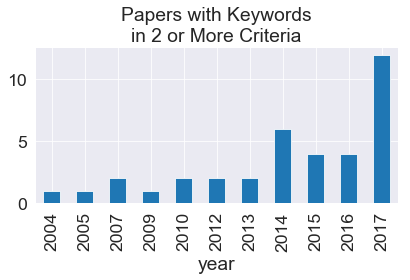

In [24]:
criteria_df = wosis.collate_keyword_criteria_matches(filtered_corpora, crit_matches)
wos_plot.plot_criteria_trend(criteria_df, threshold=2)

In [25]:
criteria_df.count()

abstract              13955
id                    13955
keywords              13955
title                 13955
year                  13955
num_criteria_match    13955
dtype: int64

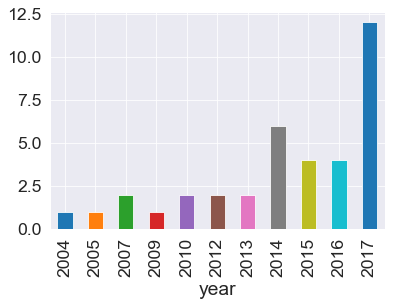

In [26]:
#want to view the papers in the above plot
crit_trend_tmp = criteria_df.loc[criteria_df['num_criteria_match'] > 1, ~criteria_df.columns.isin(hide_columns)]
#criteria_trend.loc[:, criteria_trend.columns.isin(hide_columns)].head(10)


crit_trend_tmp.groupby('year').count()['title'].plot(kind='bar')

In [27]:
crit_trend_tmp['title']

270      Development of early-warning protocol for pred...
281      Plastic litter in sediments from the Croatian ...
1187     Assessing the robustness of adaptation decisio...
2196     SensSB: a software toolbox for the development...
2236     A successive steady-state model for simulating...
2348     Sensitivity analysis of reference evapotranspi...
2512     Mortality sensitivity in life-stage simulation...
3035     Global Sensitivity Analysis Techniques for Pro...
3517     Predicting the fate of micropollutants during ...
4066     The use of global sensitivity analysis for imp...
4075     A comparison between the uncertainties in mode...
4481     Distributed Evaluation of Local Sensitivity An...
5141     Evaluating the Use of Global Sensitivity Analy...
5219     Sensitivity analysis of related parameters in ...
5246     Assessment of parametric uncertainty for groun...
5806     Effect of Single and Multisite Calibration Tec...
6570     Ligand Binding Site Detection by Local Structu.

In [28]:
?wosis.keyword_matches

In [29]:
lsa_recs, lsa_summary = wosis.keyword_matches(filtered_corpora, criteria['LSA'], threshold=95.0)

In [30]:
from functools import reduce

In [31]:
lsa_collated = reduce(lambda x, y: x + y, list(lsa_recs.values()))

In [32]:
lsa_df = wosis.rc_to_df(lsa_collated)

In [33]:
gsa_recs, gsa_summary = wosis.keyword_matches(filtered_corpora, criteria['GSA'], threshold=95.0)
gsa_collated = reduce(lambda x, y: x + y, list(gsa_recs.values()))
gsa_df = wosis.rc_to_df(gsa_collated)

In [34]:
oat_recs, oat_summary = wosis.keyword_matches(filtered_corpora, criteria['OAT'], threshold=95.0)
oat_collated = reduce(lambda x, y: x + y, list(oat_recs.values()))
oat_df = wosis.rc_to_df(oat_collated)

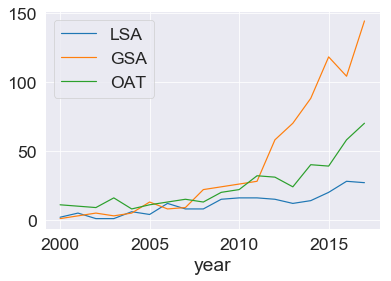

In [35]:
ax = lsa_df.groupby('year').count()['title'].plot(label="LSA", legend=True)
ax = gsa_df.groupby("year").count()['title'].plot(ax=ax, label="GSA", legend=True)
oat_df.groupby("year").count()['title'].plot(ax=ax, label="OAT", legend=True)